Saving SMSSpamCollection to SMSSpamCollection
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     747
Name: count, dtype: int64

Accuracy: 0.9704035874439462

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       966
           1       0.99      0.79      0.88       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



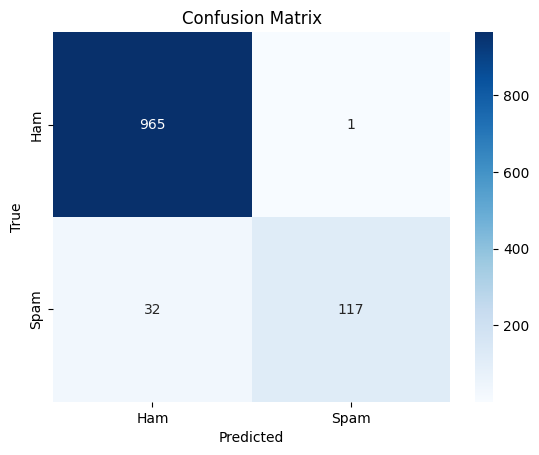


Prediction example:
Spam


In [1]:
# Step 1: Install & Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import re
import string

# Step 2: Load the Data
from google.colab import files
uploaded = files.upload()

# This assumes you uploaded 'SMSSpamCollection'
data = pd.read_csv('SMSSpamCollection', sep='\t', names=['label', 'message'])

# Step 3: Explore the Data
print(data.head())
print(data.label.value_counts())

# Step 4: Preprocessing

# Function to clean text
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.strip()
    return text

data['cleaned_message'] = data['message'].apply(clean_text)

# Step 5: Encode the labels
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

# Step 6: Train-Test Split
X = data['cleaned_message']
y = data['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Vectorization (TF-IDF)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 8: Train the Model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 9: Evaluate the Model
y_pred = model.predict(X_test_vec)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# OPTIONAL: Try the model on your own text
def predict_spam(text):
    text = clean_text(text)
    text_vec = vectorizer.transform([text])
    prediction = model.predict(text_vec)[0]
    return 'Spam' if prediction == 1 else 'Ham'

# Example
print("\nPrediction example:")
print(predict_spam("Congratulations! You've won a free ticket! Call now!"))
